# Data Explanation

In [1]:
# imports
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.io import imread

# Folder structure and comments

- arrays: Data saved in numpy format to easily start training models.
          Its shape is (height, width, 4), meaning the picture is height$\times$width pixels.
          First 3 of the 4 channels are the RGB 0-255 pixel values.
          The 4th channel represents the class (target) with values described below.

.

- images
    - black_5_doors: 834 CAD images of a five door car with black, monochromatic background 
    - orange_3_doors: 2001 CAD images of a three door car with wavy orange background
    - photo: 169 real photos of cars


Each of them has the subfolders:
- no_segmentation: regular pictures of cars
- with_segmentation: segmented pixels of original picture are replaced by color corresponding to class (see below)

.
- images
    - landscapes: 4319 landscape images used to add as background to CAD images


# Classes

| color       | description       | class value |
|-------------|-------------------|-------------|
| orange      | hood              | 10          |
| dark green  | front door        | 20          |
| yellow      | rear door         | 30          |
| cyan        | frame             | 40          |
| purple      | rear quater panel | 50          |
| light green | trunk lid         | 60          |
| blue        | fender            | 70          |
| pink        | bumper            | 80          |
| no color    | rest of car       | 90          |


# Comments on data

The 

# Visualizing the images

We first collect all images and print some of them. After that we also load the arrays and print a random array pixel by pixel. For both we are using matplotlib.

In [13]:
# connect to google drive and define paths
try:
    import google.colab
    drive.mount('/content/drive')
    colab = True
except:
    colab = False
print(f"{colab=}")

colab=False


In [14]:
# check and define paths

data_path = 'drive/My Drive/Colab Notebooks/car_segmentation/carseg_data' if colab else 'carseg_data'
!ls $data_path

image_path = data_path+'/images/'
array_path = data_path+'/arrays/'

black_5_nseg_path = image_path + 'black_5_doors/no_segmentation'
black_5_seg_path = image_path + 'black_5_doors/with_segmentation'

orange_3_nseg_path = image_path + 'orange_3_doors/no_segmentation'
orange_3_seg_path = image_path + 'orange_3_doors/with_segmentation'

landscapes_path = image_path + 'landscapes'

photos_nseg_path = image_path + 'photo/no_segmentation'
photos_seg_path = image_path + 'photo/with_segmentation'

cad_paths_dict = {
    "black_5_doors_no_seg":black_5_nseg_path,
    "black_5_doors_seg":black_5_seg_path,
    "orange_3_doors_no_seg":orange_3_nseg_path,
    "orange_3_doors_seg":orange_3_seg_path
    }

photos_paths_dict = {
    "landscapes":landscapes_path,
    "photos_no_seg":photos_nseg_path,
    "photos_seg": photos_seg_path
}

README.txt arrays     images


In [16]:
# define a dictionary to collect the complete data
picture_png_dict = {}
picture_jpg_dict = {}

for key, value in cad_paths_dict.items():
  img_paths = glob.glob(value+'/*.png')
  picture_png_dict[key] = img_paths
  # print(f"Total images of {key}:\t", len(img_paths))

for key, value in photos_paths_dict.items():
  img_paths = glob.glob(value+'/*.jpg')
  picture_jpg_dict[key] = img_paths
  # print(f"Total images of {key}:\t", len(glob.glob(value+'/*.jpg')))


array_paths = glob.glob(array_path + '*.npy')

arrays_list = np.stack([np.load(f) for f in array_paths])

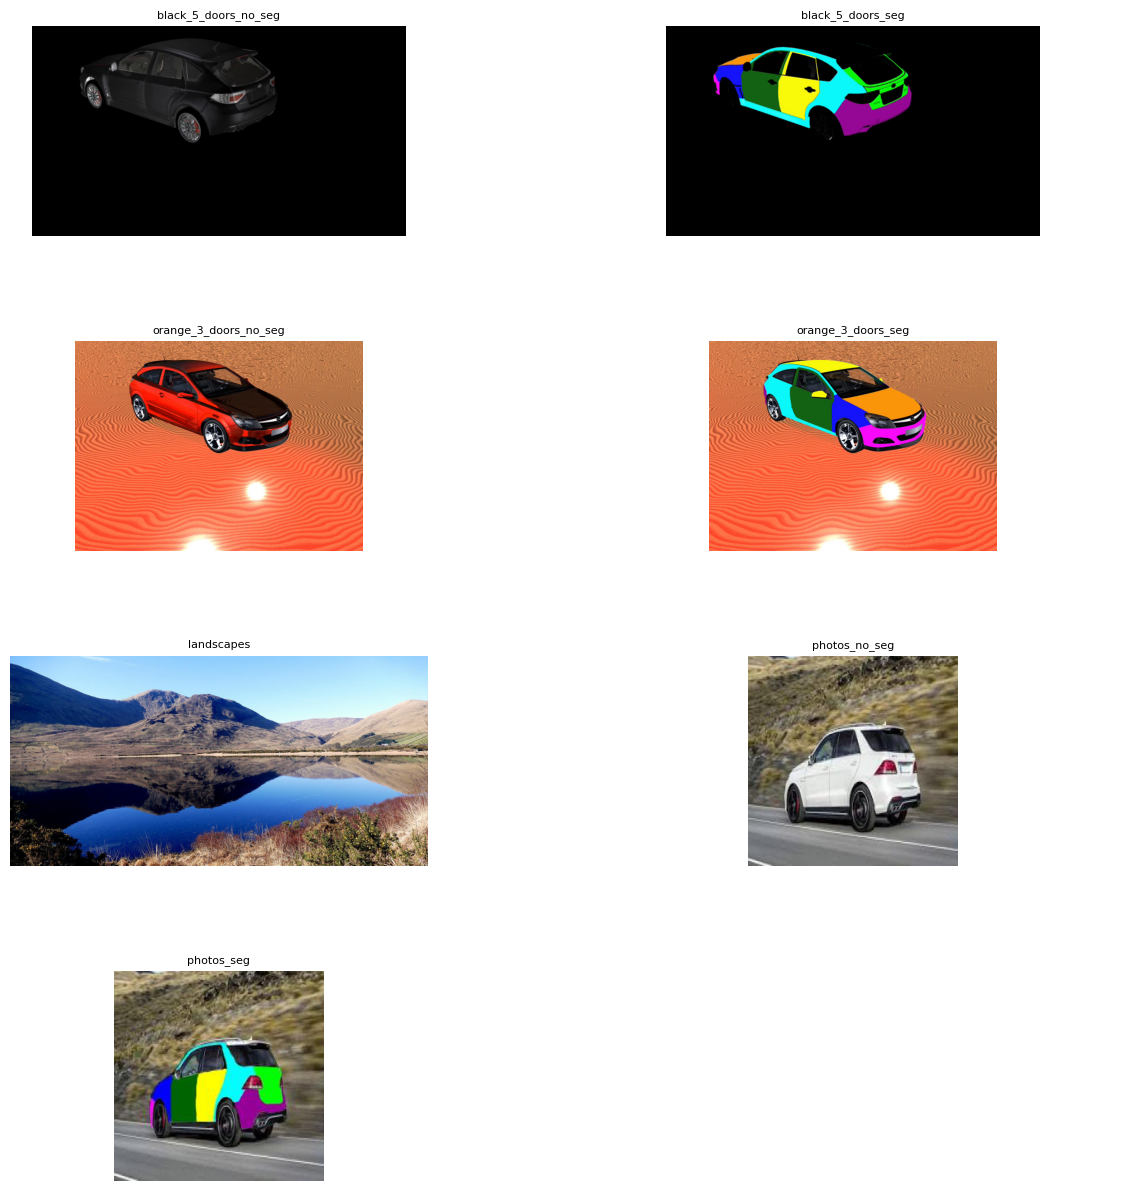

In [27]:
# Set up the grid
n_rows = 4
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust the space between plots if needed

images = []


# Loop through each species and display its image
for ax, (key, value) in zip(axes.ravel(), (picture_png_dict | picture_jpg_dict).items()):
    i = random.randint(0, len(value))
    i = 1  # DEBUGGING  
    image = imread(value[i])
    ax.imshow(image)
    ax.set_title(key, fontsize=8)
    ax.axis('off')

# Hide remaining empty subplots
axes.ravel()[7].axis('off')

plt.show()

# 
# # show a !random! picture with and without segmentation of a 5 door and a 3 door car
# for key, value in picture_png_dict.items():
#   plt.figure(figsize=(8, 8))
#   i = random.randint(0, len(value))
#   image = imread(value[i])
#   plt.imshow(image)
#   plt.axis('off')
# 
# plt.show()